<h1> R CO2 Dataset Practice </h1>

A R stock dataset is investigated, which considers how 2 treatments on plants affect their C02 update rates

In [1]:
dim(CO2)
head(CO2)

[1] 84  5

Plant,Type,Treatment,conc,uptake
<ord>,<fct>,<fct>,<dbl>,<dbl>
Qn1,Quebec,nonchilled,95,16.0
Qn1,Quebec,nonchilled,175,30.4
Qn1,Quebec,nonchilled,250,34.8
Qn1,Quebec,nonchilled,350,37.2
Qn1,Quebec,nonchilled,500,35.3
Qn1,Quebec,nonchilled,675,39.2


Examing the factor levels of each columns shows that this data set consist of paired data,
where 2 treatments are applied (nonchilled and chilled) to 2 difference types of plants,
using 3 individual plants for each treament and type.
Finally the CO2 concentration is also varied between 7 difference ambient CO2 concentrations.
Therefore the response variable of interest is the CO2 uptake rate of the 2*3*2*7=84 different cases.

In [2]:
for (col_name in names(CO2)) {print(table(CO2[[col_name]]))}


Qn1 Qn2 Qn3 Qc1 Qc3 Qc2 Mn3 Mn2 Mn1 Mc2 Mc3 Mc1 
  7   7   7   7   7   7   7   7   7   7   7   7 

     Quebec Mississippi 
         42          42 

nonchilled    chilled 
        42         42 

  95  175  250  350  500  675 1000 
  12   12   12   12   12   12   12 

 7.7  9.3 10.5 10.6 11.3 11.4   12 12.3 12.5   13 13.6 13.7 14.2 14.4 14.9 15.1 
   1    1    1    2    1    1    1    1    1    1    1    1    1    1    1    1 
  16 16.2 17.9   18 18.1 18.9 19.2 19.4 19.5 19.9   21 21.9   22 22.2 24.1 25.8 
   1    1    3    1    1    2    1    1    1    1    1    1    1    1    1    1 
26.2 27.3 27.8 27.9 28.1 28.5   30 30.3 30.4 30.6 30.9 31.1 31.5 31.8 32.4 32.5 
   1    2    1    1    1    1    1    1    1    1    1    1    1    1    3    1 
  34 34.6 34.8   35 35.3 35.4 35.5 37.1 37.2 37.5 38.1 38.6 38.7 38.8 38.9 39.2 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
39.6 39.7 40.3 40.6 41.4 41.8 42.1 42.4 42.9 43.9 44.3 45.5 
   1    1    1    1 

Consider the two subsets of nonchilled and chilled treatments, then order them both in the same way,
in order to ensure that the data is properly paired.

In [3]:
nonchilled_df = CO2[which(CO2$Treatment == 'nonchilled'), ]
nonchilled_df = nonchilled_df[order(as.character(nonchilled_df$Plant), as.numeric(nonchilled_df$conc)), ]
head(nonchilled_df, 10)

,Plant,Type,Treatment,conc,uptake
,<ord>,<fct>,<fct>,<dbl>,<dbl>
43,Mn1,Mississippi,nonchilled,95,10.6
44,Mn1,Mississippi,nonchilled,175,19.2
45,Mn1,Mississippi,nonchilled,250,26.2
46,Mn1,Mississippi,nonchilled,350,30.0
47,Mn1,Mississippi,nonchilled,500,30.9
48,Mn1,Mississippi,nonchilled,675,32.4
49,Mn1,Mississippi,nonchilled,1000,35.5
50,Mn2,Mississippi,nonchilled,95,12.0
51,Mn2,Mississippi,nonchilled,175,22.0


In [4]:
chilled_df = CO2[which(CO2$Treatment == 'chilled'), ]
chilled_df = chilled_df[order(as.character(chilled_df$Plant), as.numeric(chilled_df$conc)), ]
head(chilled_df, 10)

,Plant,Type,Treatment,conc,uptake
,<ord>,<fct>,<fct>,<dbl>,<dbl>
64,Mc1,Mississippi,chilled,95,10.5
65,Mc1,Mississippi,chilled,175,14.9
66,Mc1,Mississippi,chilled,250,18.1
67,Mc1,Mississippi,chilled,350,18.9
68,Mc1,Mississippi,chilled,500,19.5
69,Mc1,Mississippi,chilled,675,22.2
70,Mc1,Mississippi,chilled,1000,21.9
71,Mc2,Mississippi,chilled,95,7.7
72,Mc2,Mississippi,chilled,175,11.4


In [5]:
diff_df = nonchilled_df[, names(nonchilled_df) %in% c('Plant', 'Type')]
diff_df['uptake_diff'] = nonchilled_df$uptake - chilled_df$uptake
head(diff_df, 10)

,Plant,Type,uptake_diff
,<ord>,<fct>,<dbl>
43,Mn1,Mississippi,0.1
44,Mn1,Mississippi,4.3
45,Mn1,Mississippi,8.1
46,Mn1,Mississippi,11.1
47,Mn1,Mississippi,11.4
48,Mn1,Mississippi,10.2
49,Mn1,Mississippi,13.6
50,Mn2,Mississippi,4.3
51,Mn2,Mississippi,10.6


Simple investigation suggests that the nonchilled treatment induces higher CO2 update rates in the plants.
An easy way to see this is by their sample distributions.

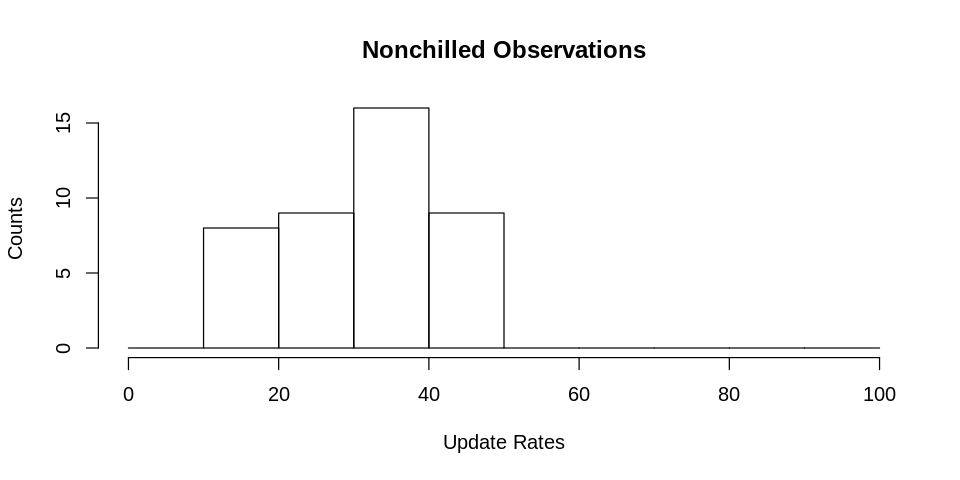

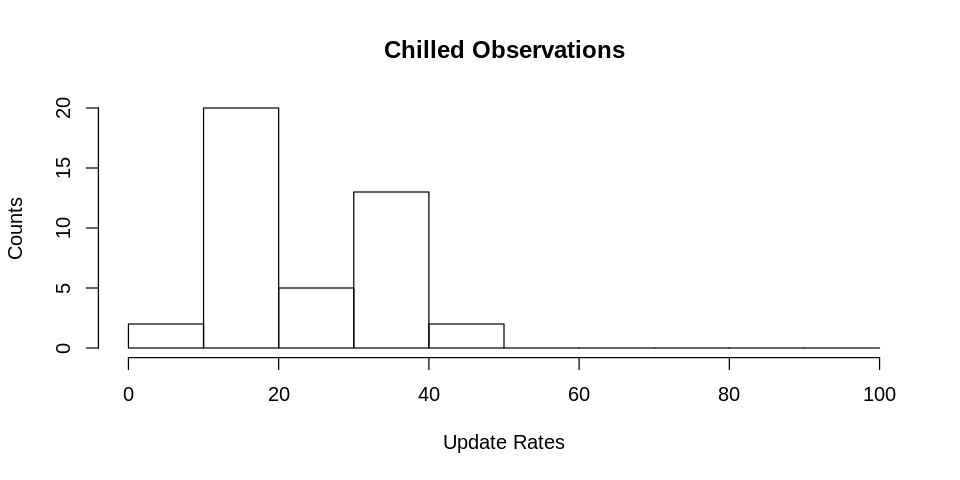

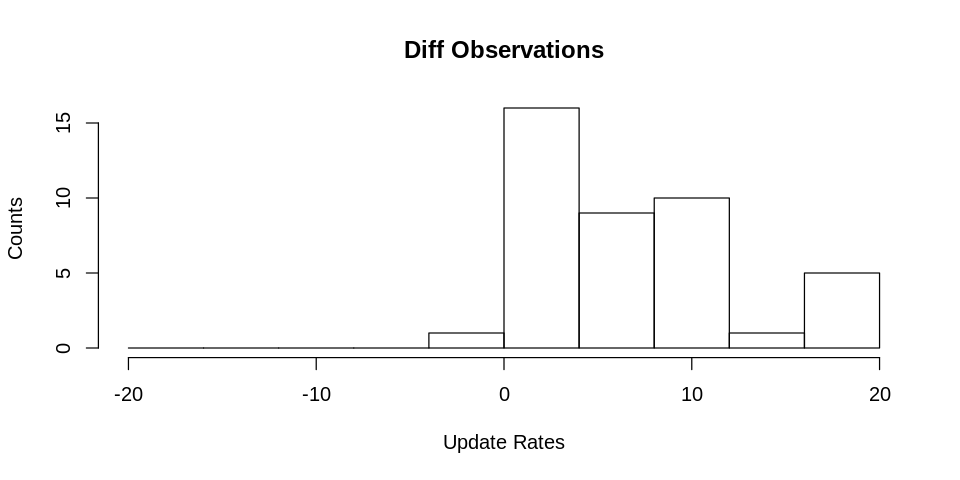

In [6]:
library(repr)
options(repr.plot.width=8, repr.plot.height=4)
hist(nonchilled_df$uptake, main='Nonchilled Observations', xlab='Update Rates', ylab='Counts',
     breaks=10*0:10, xlim=c(0, 100))
hist(chilled_df$uptake, main='Chilled Observations', xlab='Update Rates', ylab='Counts',
     breaks=10*0:10, xlim=c(0, 100))
hist(diff_df$uptake_diff, main='Diff Observations', xlab='Update Rates', ylab='Counts',
     breaks=4*-5:5, xlim=c(-20, 20))

At this point, it can be more robustly proven that there is a statistical difference between the 2 treatment.
Here a t-test is an easy and appropriate way to validate this difference.
Notice that a paired t-test is equivalent to a one-sample t-test of the differences.
(The consistent ordering of the paired data mentioned previously is important here.)

In [7]:
t.test(diff_df$uptake_diff)


	One Sample t-test

data:  diff_df$uptake_diff
t = 7.939, df = 41, p-value = 8.051e-10
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 5.114589 8.604458
sample estimates:
mean of x 
 6.859524 


In [8]:
t.test(nonchilled_df$uptake, chilled_df$uptake, paired=T)


	Paired t-test

data:  nonchilled_df$uptake and chilled_df$uptake
t = 7.939, df = 41, p-value = 8.051e-10
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 5.114589 8.604458
sample estimates:
mean of the differences 
               6.859524 


Here the p-value is clearly significant ($p<0.05$ is an understatement),
so the chilled treatment does indeed reduce CO2 uptake rates,
with an expected reduction of $6.86$, with a 95% confidence intervale of $[5.11, 8.60]$.
Notice that the paired nature of the data was indeed important,
as the unpaired t-test yields a much less accurate confidence interval for the treatment uptake rate difference.

In [9]:
t.test(nonchilled_df$uptake, chilled_df$uptake)


	Welch Two Sample t-test

data:  nonchilled_df$uptake and chilled_df$uptake
t = 3.0485, df = 80.945, p-value = 0.003107
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  2.382366 11.336682
sample estimates:
mean of x mean of y 
 30.64286  23.78333 
